# Öffnen von CZI-Dateien
Bei der Arbeit mit Mikroskopie-Bilddaten sind viele Dateiformate im Umlauf, wie zum Beispiel das Carl Zeiss Image (CZI) Format. In diesem Notebook werden wir eine `.czi`-Datei mit Hilfe der [`czifile` Bibliothek](https://pypi.org/project/czifile/) öffnen.

Hinweis: Es wird empfohlen, [AICSImageIO](https://github.com/AllenCellModeling/aicsimageio) zum Lesen von CZI-Dateien zu verwenden, wie in diesem [Notebook](image_file_formats:aicsimagio) gezeigt.

Siehe auch
* [CZI-Datei in Python lesen (image.sc Thread)](https://forum.image.sc/t/reading-czi-file-in-python/39768/11))

In [1]:
import czifile

from pathlib import Path
from skimage.io import imshow
import numpy as np

Normalerweise können wir ein Bild öffnen, indem wir einer `imread`-Funktion einen Pfad dazu angeben. Im Folgenden verwenden wir ein Bild, das einen Drosophila-Flügel während des Puppenstadiums zeigt, freundlicherweise zur Verfügung gestellt von Romina Piscitello-Gómez (MPI CBG).

In [2]:
image = czifile.imread(Path("../../data/PupalWing.czi"))

Ein guter erster Schritt ist es, die Dimensionalität des Bildes zu überprüfen.

In [3]:
image.shape

(1, 1, 1, 80, 520, 692, 1)

Diese Formate haben normalerweise zusätzliche Dimensionen, um viele verschiedene Datenformen aufnehmen zu können. Dies ist ihre übliche Reihenfolge bei der Arbeit mit CZI-Dateien:
- 'X': 'Breite'
- 'Y': 'Höhe'
- 'C': 'Kanal'
- 'Z': 'Schicht' (Tiefe)
- 'T': 'Zeit'
- 'R': 'Rotation'
- 'S': 'Szene' / zusammenhängende Interessenregionen in einem Mosaikbild

Wir wissen, dass unser Bild bei der Aufnahme drei Dimensionen hatte. Ein Trick, um die unnötigen zusätzlichen Dimensionen loszuwerden, ist die Funktion [np.squeeze](https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html).

In [4]:
image_squeezed = np.squeeze(image)
image_squeezed.shape

(80, 520, 692)

Das Bild ist ein numpy-Array und wir können daher normal damit arbeiten.

In [5]:
type(image_squeezed)

numpy.ndarray

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


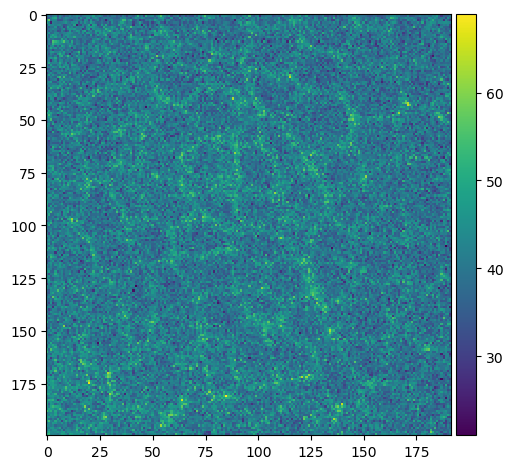

In [6]:
cropped_slice_image = image_squeezed[40, 200:400, 500:700]

imshow(cropped_slice_image)